## Class 4 29-09-2020

In [1]:
# Supress Warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Importing libraries and changing os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#os.chdir("C:\\Users\\hp\\Desktop\\Module 6\\Machine Learning Algorithms")
os.chdir("C:\\Users\\INTEL\\Desktop\\Sravan\\Module 6\\Machine Learning Algorithms")

In [3]:
# Reading Dataset
df = pd.read_csv('Admission_Predict.csv')

In [4]:
# Check if the data is correctly loaded
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1
396,397,325,107,3,3.0,3.5,9.11,1,1
397,398,330,116,4,5.0,4.5,9.45,1,1
398,399,312,103,3,3.5,4.0,8.78,0,0


In [5]:
# Check thr data types of the varaiable
# dtypes is an attribute of a dataframe and not a function
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit        int64
dtype: object

In [6]:
# Correct the datatype for research variable
df['Research'] = df['Research'].astype('object')

In [7]:
# check if the datatype for the research varaible has been changed
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit        int64
dtype: object

In [8]:
# Check missing values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
# Drop unnecessary variables
# axis =1 is to tell the drop() that look for 'Serial number' row wise
# axis =0 is to tell the drop() that look for 'Serial number' column wise
df = df.drop('Serial No.',axis =1)

In [10]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [11]:
# We will set some global settings for the charts  for the notebook
# we will use rcParams
plt.rcParams['figure.figsize'] = [15,8]

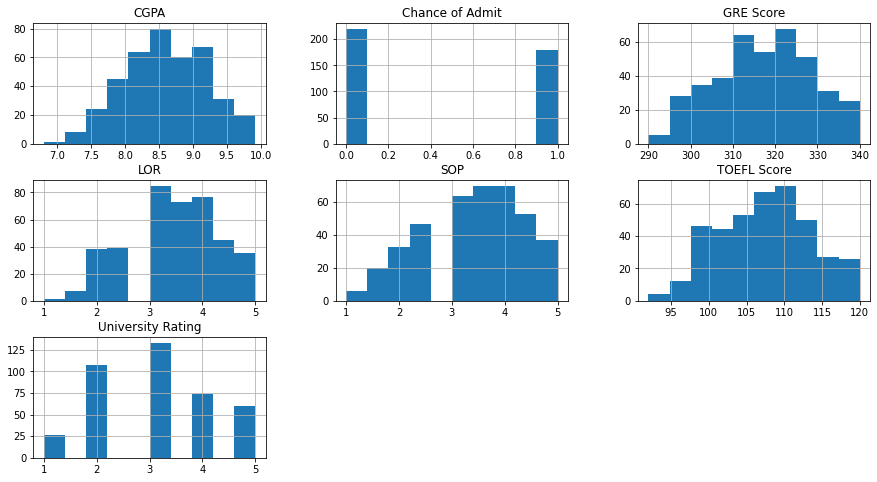

In [12]:
# check the distribuion of each variable
df.hist()
# remove unwanted details
plt.show()

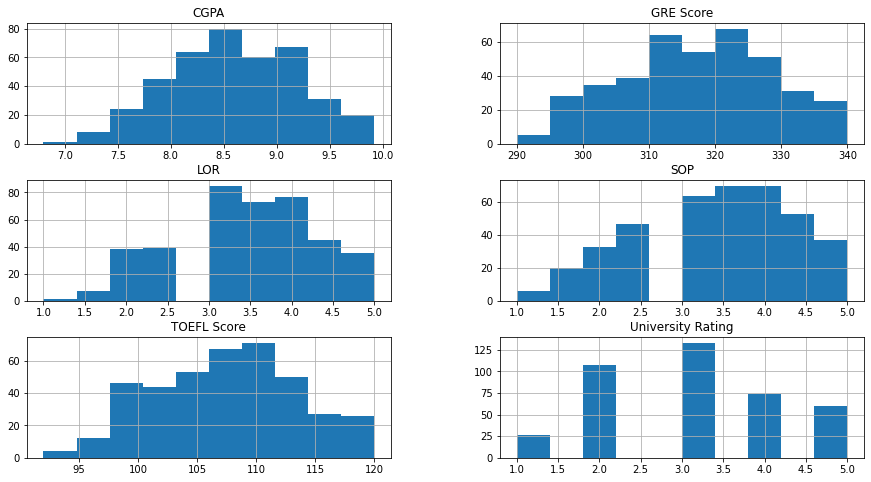

In [13]:
# To remove unwanted histograms
# To remove Chance of admit
df.drop('Chance of Admit',axis=1).hist()
plt.show()

* The data for each of the variables is more or what normally distributed
* the data is not more skewed
* the most of the data is bell curved
* The data is good

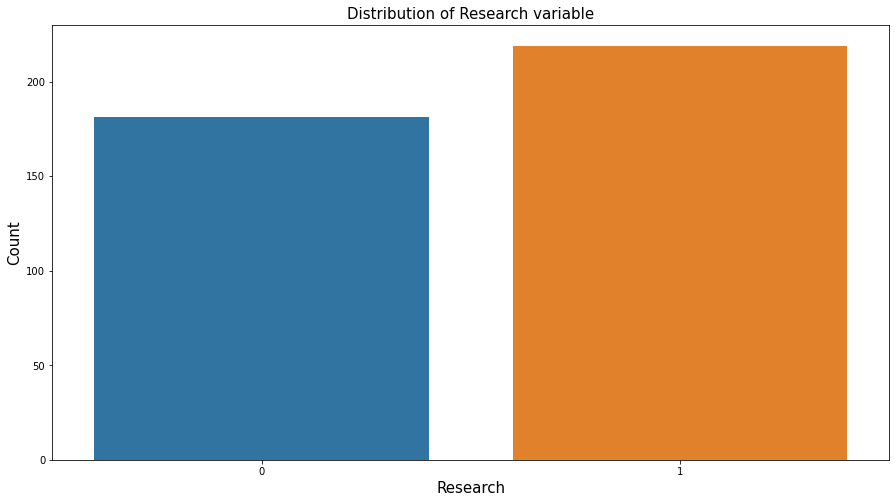

In [14]:
# Lets study the distribution of categorical variables
sns.countplot(df["Research"])
#plt.show()
# Seaborn library is built on top of Matplotlib
# Seaborn internally uses matplotlib

plt.title("Distribution of Research variable",fontsize=15)
plt.xlabel('Research',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

* For a numeric variable data is skewed, for a categorical data you will say that the data is imbalanced

In [15]:
df['Research'].value_counts()
print(219/400)
print(181/400)

0.5475
0.4525


* The data is quite balanced
* In scenarios like 90%-10% or 80%-20%, Then we might consider data is imbalnced

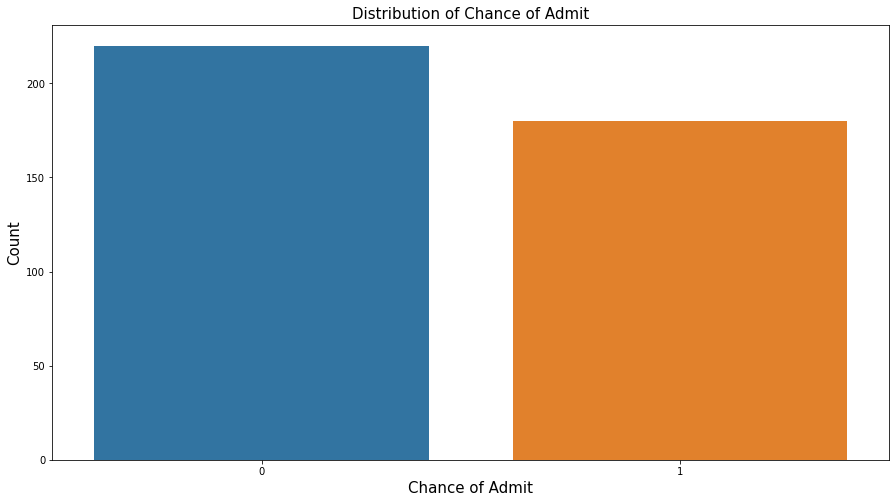

In [16]:
# Lets see the distribution of our target variable
# Lets study the distribution of categorical variables
sns.countplot(df["Chance of Admit"])
#plt.show()
# Seaborn library is built on top of Matplotlib
# Seaborn internally uses matplotlib

plt.title("Distribution of Chance of Admit",fontsize=15)
plt.xlabel('Chance of Admit',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

 Scaling is done for numeric variables
 
Normalization  ( Min-Max Scaling)

Characteristic of the transformed Data:
* The scaled data will be alwats between 0 & 1



Standardization ( Standardization/ (z-score scaling))

Characteristic of the transformed Data:
* The scaled data willhave a mean of 0 and std.dev of 1


In [17]:
# 1. We will seperate out target variablles and features variables
# 2. we take the feature variables and seperate the numeric & categorical variables from the feature set
# 3. We will perform encoding on categorical variable
# 4. We will scale our numeric varaivbles
# 5. We will concatenate the c=scaled numeric and encoded categorical variables

In [18]:
# 1. We will seperate out target variablles and features variables
df_target = df['Chance of Admit']
df_features = df.drop('Chance of Admit',axis=1)

In [19]:
df_features.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [20]:
# 2. we take the feature variables and seperate the numeric & categorical variables from the feature set
df_numeric =df_features.select_dtypes(include=[np.number])
df_categorical = df_features.select_dtypes(include=[np.object])

In [21]:
df_numeric.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
dtype: object

In [22]:
df_categorical.dtypes

Research    object
dtype: object

In [23]:
# 3. We will perform encoding on categorical variable
# get_dummies() is the function that encodes the variable,
#  if we use drop_first = True it will give n-1 dummy encoding
#  if we use drop_first = False it will one-hot encoding
df_encoded = pd.get_dummies(df_categorical,drop_first = True) # N-1 encoding drop_first = False for one-hot

In [24]:
df_encoded.head()

,Research_1
0,1
1,1
2,1
3,1
4,0


In [39]:
# 4. We will scale our numeric varaibles
from sklearn.preprocessing import StandardScaler # Z-Score standardization
# StandarScaler is a function that scales data with Z-score standardization
# Initialize the standardizescaler
X_scaler = StandardScaler()

df_scaled = X_scaler.fit_transform(df_numeric)

print(type(df_scaled))
print('\n') # give a blank line
print(df_scaled)


# what is module used for scaling data
# Ans preprocessing

<class 'numpy.ndarray'>


[[ 1.76210664  1.74697064  0.79882862  1.09386422  1.16732114  1.76481828]
 [ 0.62765641 -0.06763531  0.79882862  0.59665321  1.16732114  0.45515126]
 [-0.07046681 -0.56252785 -0.07660001 -0.39776881  0.05293342 -1.00563118]
 ...
 [ 1.15124883  1.41704229  0.79882862  1.59107523  1.16732114  1.42900622]
 [-0.41952842 -0.72749202 -0.07660001  0.0994422   0.61012728  0.30403584]
 [ 1.41304503  1.58200646  0.79882862  1.59107523  0.61012728  1.78160888]]


In [40]:
df_scaled_df = pd.DataFrame(df_scaled,columns = df_numeric.columns)

In [41]:
df_scaled_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029


In [42]:
# 5. We will concatenate the scaled numeric and encoded categorical variables
df_merge = pd.concat([df_scaled_df,df_encoded],axis=1)

In [43]:
df_merge.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,1
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,1
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,1
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,1
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,0


In [44]:
# We will have to split the data into train & test data
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
df_merge = sm.add_constant(df_merge)
X_train,X_test,y_train,y_test = train_test_split(df_merge,df_target,random_state=123,test_size=0.2)

# what is module used for train_test_split
# Ans model_selection

In [45]:
print("the shape of X_train is: ",X_train.shape)

# print dimensions of predictors test set
print("the shape of X_test is: ",X_test.shape)

# print dimensions of target train set
print("the shape of y_train is: ",y_train.shape)

# print dimensions of target test set
print("the shape of y_test is: ",y_test.shape)

the shape of X_train is:  (320, 7)
the shape of X_test is:  (80, 7)
the shape of y_train is:  (320,)
the shape of y_test is:  (80,)


In [46]:
y_train.head()

178    0
252    0
6      1
274    0
125    0
Name: Chance of Admit, dtype: int64

## Class-5 30-09-2020